# STOCHASTIC BANDITS

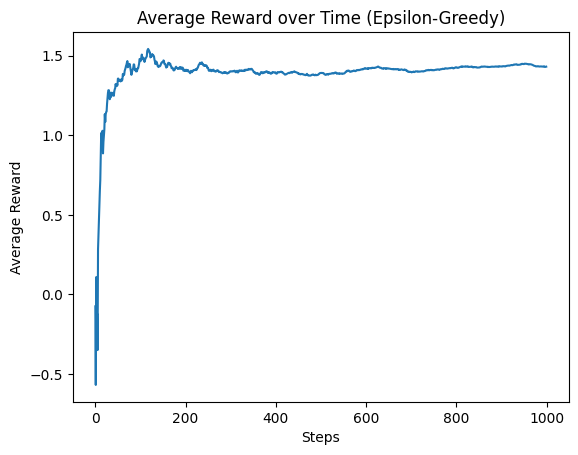

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class StochasticBandit:
    def __init__(self, n_arms):
        """
        Initialize a stochastic K-armed bandit problem with random reward distributions.

        Args:
            n_arms (int): Number of arms (actions) in the bandit.
        """
        self.n_arms = n_arms
        self.q_true = np.random.normal(0, 1, self.n_arms)  # True reward distributions for each arm

    def pull_arm(self, arm_idx):
        """
        Simulate pulling an arm and receiving a reward from the chosen arm.

        Args:
            arm_idx (int): Index of the arm to pull.

        Returns:
            float: Reward received from pulling the chosen arm.
        """
        reward = np.random.normal(self.q_true[arm_idx], 1)  # Reward from a normal distribution around q_true
        return reward

class EpsilonGreedyAgent:
    def __init__(self, n_arms, epsilon=0.1):
        """
        Initialize an Epsilon-Greedy agent for the stochastic bandit problem.

        Args:
            n_arms (int): Number of arms in the bandit.
            epsilon (float): Probability of choosing a random arm (exploration rate).
        """
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.Q = np.zeros(n_arms)  # Estimated values of each arm (Q-values)
        self.N = np.zeros(n_arms)  # Number of times each arm has been pulled

    def choose_arm(self):
        """
        Epsilon-Greedy action selection: choose either a random arm (exploration) or the best known arm (exploitation).

        Returns:
            int: Index of the chosen arm.
        """
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.n_arms)  # Explore: randomly choose an arm
        else:
            return np.argmax(self.Q)  # Exploit: choose the arm with the highest estimated value (Q-value)

    def update(self, arm_idx, reward):
        """
        Update Q-values based on the received reward from pulling a specific arm.

        Args:
            arm_idx (int): Index of the arm that was pulled.
            reward (float): Reward received from pulling the arm.
        """
        self.N[arm_idx] += 1
        self.Q[arm_idx] += (reward - self.Q[arm_idx]) / self.N[arm_idx]  # Update Q-value estimate incrementally


def run_bandit_simulation(agent, bandit, num_steps):
    """
    Run a simulation of the bandit problem with a specific agent over a given number of steps.

    Args:
        agent (object): Bandit agent implementing a specific policy (e.g., EpsilonGreedyAgent).
        bandit (object): StochasticBandit instance representing the environment.
        num_steps (int): Number of steps (arm pulls) to simulate.

    Returns:
        list: List of rewards received at each step of the simulation.
    """
    rewards = []
    for _ in range(num_steps):
        arm_idx = agent.choose_arm()  # Agent chooses which arm to pull
        reward = bandit.pull_arm(arm_idx)  # Bandit returns a reward for the chosen arm
        agent.update(arm_idx, reward)  # Agent updates its policy based on the received reward
        rewards.append(reward)
    return rewards


# Main code to set up and run the bandit simulation
if __name__ == "__main__":
    np.random.seed(42)  # Set random seed for reproducibility

    # Parameters
    n_arms = 10  # Number of arms in the bandit
    num_steps = 1000  # Number of steps (arm pulls) in the simulation
    epsilon = 0.1  # Epsilon value for Epsilon-Greedy agent

    # Initialize a stochastic K-armed bandit problem
    bandit = StochasticBandit(n_arms)

    # Initialize an Epsilon-Greedy agent
    agent = EpsilonGreedyAgent(n_arms, epsilon)

    # Run the bandit simulation with the chosen agent
    rewards = run_bandit_simulation(agent, bandit, num_steps)

    # Plot average reward over time
    avg_rewards = np.cumsum(rewards) / np.arange(1, num_steps + 1)
    plt.plot(avg_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time (Epsilon-Greedy)')
    plt.show()

Agent chooses to exploit.
Updated Q-value for arm 0: -0.07466601274290885
Step 1: Chose arm 0, received reward -0.07466601274290885
Agent chooses to exploit.
Updated Q-value for arm 1: -1.0623471389182895
Step 2: Chose arm 1, received reward -1.0623471389182895
Agent chooses to exploit.
Updated Q-value for arm 2: 1.4641336190520198
Step 3: Chose arm 2, received reward 1.4641336190520198
Agent chooses to exploit.
Updated Q-value for arm 2: 0.2939730797684257
Step 4: Chose arm 2, received reward -0.8761874595151684
Agent chooses to exploit.
Updated Q-value for arm 2: 0.17743029864337884
Step 5: Chose arm 2, received reward -0.0556552636067148
Agent chooses to exploit.
Updated Q-value for arm 2: -0.23991030551135262
Step 6: Chose arm 2, received reward -1.491932117975547
Agent chooses to exploit.
Updated Q-value for arm 3: 4.082517887445818
Step 7: Chose arm 3, received reward 4.082517887445818
Agent chooses to explore.
Updated Q-value for arm 2: 0.016456067586976653
Step 8: Chose arm 2, 

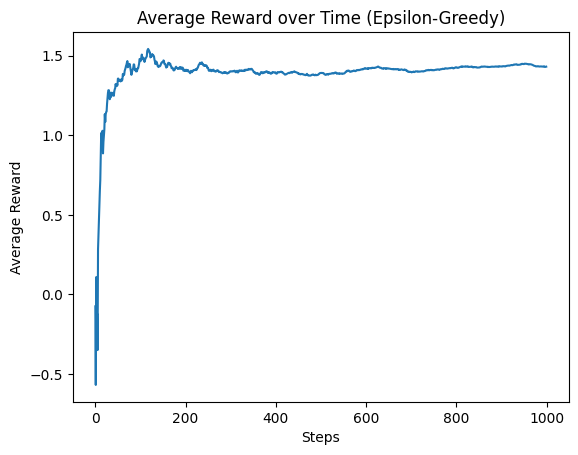

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class StochasticBandit:
    def __init__(self, n_arms):
        """
        Initialize a stochastic K-armed bandit problem with random reward distributions.

        Args:
            n_arms (int): Number of arms (actions) in the bandit.
        """
        self.n_arms = n_arms
        self.q_true = np.random.normal(0, 1, self.n_arms)  # True reward distributions for each arm

    def pull_arm(self, arm_idx):
        """
        Simulate pulling an arm and receiving a reward from the chosen arm.

        Args:
            arm_idx (int): Index of the arm to pull.

        Returns:
            float: Reward received from pulling the chosen arm.
        """
        reward = np.random.normal(self.q_true[arm_idx], 1)  # Reward from a normal distribution around q_true
        return reward

class EpsilonGreedyAgent:
    def __init__(self, n_arms, epsilon=0.1):
        """
        Initialize an Epsilon-Greedy agent for the stochastic bandit problem.

        Args:
            n_arms (int): Number of arms in the bandit.
            epsilon (float): Probability of choosing a random arm (exploration rate).
        """
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.Q = np.zeros(n_arms)  # Estimated values of each arm (Q-values)
        self.N = np.zeros(n_arms)  # Number of times each arm has been pulled

    def choose_arm(self):
        """
        Epsilon-Greedy action selection: choose either a random arm (exploration) or the best known arm (exploitation).

        Returns:
            int: Index of the chosen arm.
        """
        if np.random.rand() < self.epsilon:
            print("Agent chooses to explore.")  # Print exploration step
            return np.random.choice(self.n_arms)  # Explore: randomly choose an arm
        else:
            print("Agent chooses to exploit.")  # Print exploitation step
            return np.argmax(self.Q)  # Exploit: choose the arm with the highest estimated value (Q-value)

    def update(self, arm_idx, reward):
        """
        Update Q-values based on the received reward from pulling a specific arm.

        Args:
            arm_idx (int): Index of the arm that was pulled.
            reward (float): Reward received from pulling the arm.
        """
        self.N[arm_idx] += 1
        self.Q[arm_idx] += (reward - self.Q[arm_idx]) / self.N[arm_idx]  # Update Q-value estimate incrementally
        print(f"Updated Q-value for arm {arm_idx}: {self.Q[arm_idx]}")  # Print updated Q-value


def run_bandit_simulation(agent, bandit, num_steps):
    """
    Run a simulation of the bandit problem with a specific agent over a given number of steps.

    Args:
        agent (object): Bandit agent implementing a specific policy (e.g., EpsilonGreedyAgent).
        bandit (object): StochasticBandit instance representing the environment.
        num_steps (int): Number of steps (arm pulls) to simulate.

    Returns:
        list: List of rewards received at each step of the simulation.
    """
    rewards = []
    for step in range(num_steps):
        arm_idx = agent.choose_arm()  # Agent chooses which arm to pull
        reward = bandit.pull_arm(arm_idx)  # Bandit returns a reward for the chosen arm
        agent.update(arm_idx, reward)  # Agent updates its policy based on the received reward
        rewards.append(reward)
        print(f"Step {step + 1}: Chose arm {arm_idx}, received reward {reward}")
    return rewards


# Main code to set up and run the bandit simulation
if __name__ == "__main__":
    np.random.seed(42)  # Set random seed for reproducibility

    # Parameters
    n_arms = 10  # Number of arms in the bandit
    num_steps = 1000  # Number of steps (arm pulls) in the simulation
    epsilon = 0.1  # Epsilon value for Epsilon-Greedy agent

    # Initialize a stochastic K-armed bandit problem
    bandit = StochasticBandit(n_arms)

    # Initialize an Epsilon-Greedy agent
    agent = EpsilonGreedyAgent(n_arms, epsilon)

    # Run the bandit simulation with the chosen agent
    rewards = run_bandit_simulation(agent, bandit, num_steps)

    # Plot average reward over time
    avg_rewards = np.cumsum(rewards) / np.arange(1, num_steps + 1)
    plt.plot(avg_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time (Epsilon-Greedy)')
    plt.show()

# Warm Up: Full Info Case

Step 1: Chose arm 6, received reward 1.1157951226949292
Step 2: Chose arm 6, received reward 1.1134830619371345
Step 3: Chose arm 6, received reward 1.8211750870734256
Step 4: Chose arm 6, received reward -0.33406742915040644
Step 5: Chose arm 6, received reward -0.1457050170056413
Step 6: Chose arm 6, received reward 1.0169252862664186
Step 7: Chose arm 6, received reward 0.5663816951729677
Step 8: Chose arm 6, received reward 1.8934601481026654
Step 9: Chose arm 6, received reward 0.6711887399861806
Step 10: Chose arm 6, received reward 0.16690911417209997
Step 11: Chose arm 6, received reward 3.0448615844289453
Step 12: Chose arm 6, received reward 1.3534365150208558
Step 13: Chose arm 6, received reward 1.6467410201953152
Step 14: Chose arm 6, received reward 0.15446462929393467
Step 15: Chose arm 6, received reward 1.0348300909822088
Step 16: Chose arm 6, received reward 1.6901354052172575
Step 17: Chose arm 6, received reward 0.42821923808508866
Step 18: Chose arm 6, received rew

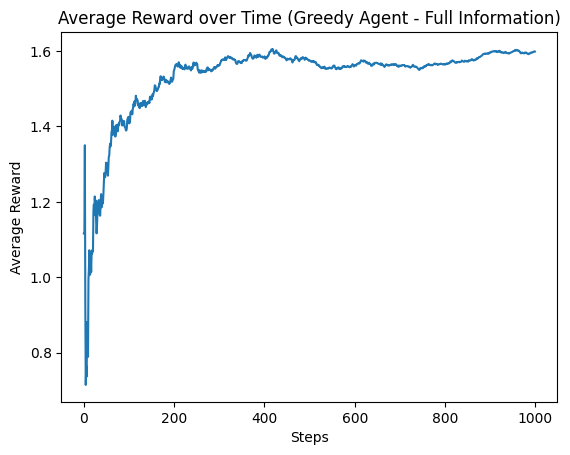

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class FullInfoBandit:
    def __init__(self, q_true):
        """
        Initialize a full information bandit problem with known reward distributions.

        Args:
            q_true (ndarray): Array of true reward means for each arm.
        """
        self.n_arms = len(q_true)
        self.q_true = q_true  # True reward distributions for each arm

    def pull_arm(self, arm_idx):
        """
        Simulate pulling an arm and receiving a reward from the chosen arm.

        Args:
            arm_idx (int): Index of the arm to pull.

        Returns:
            float: Reward received from pulling the chosen arm.
        """
        reward = np.random.normal(self.q_true[arm_idx], 1)  # Reward from a normal distribution around q_true
        return reward

class GreedyAgent:
    def __init__(self, q_true):
        """
        Initialize a Greedy agent for the full information bandit problem.

        Args:
            q_true (ndarray): Array of true reward means for each arm.
        """
        self.n_arms = len(q_true)
        self.q_true = q_true  # True reward means for each arm

    def choose_arm(self):
        """
        Greedy action selection: choose the arm with the highest known mean reward.

        Returns:
            int: Index of the chosen arm (exploiting the best arm).
        """
        return np.argmax(self.q_true)  # Exploit: choose the arm with the highest known mean reward


def run_full_info_bandit_simulation(agent, bandit, num_steps):
    """
    Run a simulation of the full information bandit problem with a specific agent over a given number of steps.

    Args:
        agent (object): Bandit agent implementing a specific policy (e.g., GreedyAgent).
        bandit (object): FullInfoBandit instance representing the environment.
        num_steps (int): Number of steps (arm pulls) to simulate.

    Returns:
        list: List of rewards received at each step of the simulation.
    """
    rewards = []
    for step in range(num_steps):
        arm_idx = agent.choose_arm()  # Agent chooses which arm to pull
        reward = bandit.pull_arm(arm_idx)  # Bandit returns a reward for the chosen arm
        rewards.append(reward)
        print(f"Step {step + 1}: Chose arm {arm_idx}, received reward {reward}")
    return rewards


# Main code to set up and run the full information bandit simulation
if __name__ == "__main__":
    np.random.seed(42)  # Set random seed for reproducibility

    # Parameters
    q_true = np.random.normal(0, 1, 10)  # True reward means for each arm (randomly generated)
    num_steps = 1000  # Number of steps (arm pulls) in the simulation

    # Initialize a full information bandit problem
    bandit = FullInfoBandit(q_true)

    # Initialize a Greedy agent (exploiting the best arm)
    agent = GreedyAgent(q_true)

    # Run the full information bandit simulation with the chosen agent
    rewards = run_full_info_bandit_simulation(agent, bandit, num_steps)

    # Plot average reward over time
    avg_reward = np.mean(rewards)
    print(f"Average reward: {avg_reward}")

    plt.plot(np.cumsum(rewards) / np.arange(1, num_steps + 1))
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time (Greedy Agent - Full Information)')
    plt.show()

# Upper Confidence Bound (UCB)

<ipython-input-4-1c92df9f5779>:49: RuntimeWarning: invalid value encountered in sqrt
  ucb_values = self.Q + self.c * np.sqrt(np.log(np.sum(self.N)) / self.N)  # UCB calculation


Choosing arm 0 with UCB value nan
Updated Q-value for arm 0: 0.03329612723749804 (N = 1.00001)
Step 1: Chose arm 0, received reward 0.03329646019877042
Choosing arm 1 with UCB value 6.324397215024349
Updated Q-value for arm 1: -0.6039880148612928 (N = 1.00001)
Step 2: Chose arm 1, received reward -0.6039940547414415
Choosing arm 2 with UCB value 526.5727601424088
Updated Q-value for arm 2: 0.8896419132475941 (N = 1.00001)
Step 3: Chose arm 2, received reward 0.8896508096667266
Choosing arm 3 with UCB value 662.9164717959269
Updated Q-value for arm 3: -0.39024648578491467 (N = 1.00001)
Step 4: Chose arm 3, received reward -0.39025038824977254
Choosing arm 4 with UCB value 744.666196575995
Updated Q-value for arm 4: -1.9590516167202014 (N = 1.00001)
Step 5: Chose arm 4, received reward -1.9590712072363687
Choosing arm 5 with UCB value 802.3609941252386
Updated Q-value for arm 5: -0.796416522024933 (N = 1.00001)
Step 6: Chose arm 5, received reward -0.7964244861901533
Choosing arm 6 with 

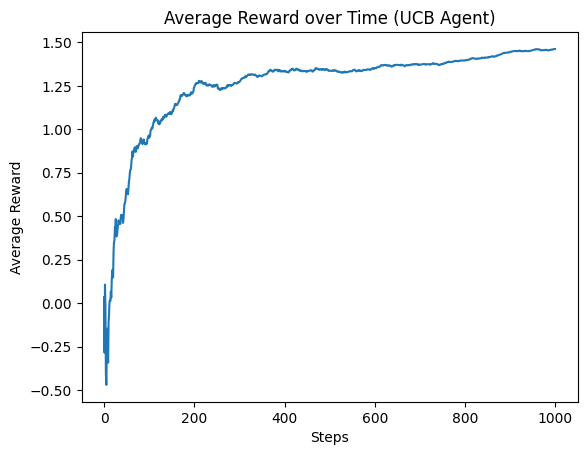

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class StochasticBandit:
    def __init__(self, n_arms):
        """
        Initialize a stochastic K-armed bandit problem with random reward distributions.

        Args:
            n_arms (int): Number of arms (actions) in the bandit.
        """
        self.n_arms = n_arms
        self.q_true = np.random.normal(0, 1, self.n_arms)  # True reward distributions for each arm

    def pull_arm(self, arm_idx):
        """
        Simulate pulling an arm and receiving a reward from the chosen arm.

        Args:
            arm_idx (int): Index of the arm to pull.

        Returns:
            float: Reward received from pulling the chosen arm.
        """
        reward = np.random.normal(self.q_true[arm_idx], 1)  # Reward from a normal distribution around q_true
        return reward

class UCBAgent:
    def __init__(self, n_arms, c=1.0):
        """
        Initialize a UCB agent for the stochastic bandit problem.

        Args:
            n_arms (int): Number of arms in the bandit.
            c (float): Exploration parameter controlling the balance between exploration and exploitation.
        """
        self.n_arms = n_arms
        self.c = c
        self.Q = np.zeros(n_arms)  # Estimated values of each arm (Q-values)
        self.N = np.zeros(n_arms) + 1e-5  # Number of times each arm has been pulled (initialized with a small value to avoid division by zero)

    def choose_arm(self):
        """
        UCB action selection: choose the arm with the highest Upper Confidence Bound.

        Returns:
            int: Index of the chosen arm based on UCB criterion.
        """
        ucb_values = self.Q + self.c * np.sqrt(np.log(np.sum(self.N)) / self.N)  # UCB calculation
        arm_idx = np.argmax(ucb_values)  # Choose arm with the highest UCB value
        print(f"Choosing arm {arm_idx} with UCB value {ucb_values[arm_idx]}")
        return arm_idx

    def update(self, arm_idx, reward):
        """
        Update Q-values based on the received reward from pulling a specific arm.

        Args:
            arm_idx (int): Index of the arm that was pulled.
            reward (float): Reward received from pulling the arm.
        """
        self.N[arm_idx] += 1
        self.Q[arm_idx] += (reward - self.Q[arm_idx]) / self.N[arm_idx]  # Update Q-value estimate incrementally
        print(f"Updated Q-value for arm {arm_idx}: {self.Q[arm_idx]} (N = {self.N[arm_idx]})")


def run_bandit_simulation(agent, bandit, num_steps):
    """
    Run a simulation of the bandit problem with a specific agent over a given number of steps.

    Args:
        agent (object): Bandit agent implementing a specific policy (e.g., UCBAgent).
        bandit (object): StochasticBandit instance representing the environment.
        num_steps (int): Number of steps (arm pulls) to simulate.

    Returns:
        list: List of rewards received at each step of the simulation.
    """
    rewards = []
    for step in range(num_steps):
        arm_idx = agent.choose_arm()  # Agent chooses which arm to pull
        reward = bandit.pull_arm(arm_idx)  # Bandit returns a reward for the chosen arm
        agent.update(arm_idx, reward)  # Agent updates its policy based on the received reward
        rewards.append(reward)
        print(f"Step {step + 1}: Chose arm {arm_idx}, received reward {reward}")
    return rewards


# Main code to set up and run the UCB bandit simulation
if __name__ == "__main__":
    np.random.seed(42)  # Set random seed for reproducibility

    # Parameters
    n_arms = 10  # Number of arms in the bandit
    num_steps = 1000  # Number of steps (arm pulls) in the simulation
    c = 2.0  # UCB exploration parameter

    # Initialize a stochastic K-armed bandit problem
    bandit = StochasticBandit(n_arms)

    # Initialize a UCB agent
    agent = UCBAgent(n_arms, c)

    # Run the UCB bandit simulation with the chosen agent
    rewards = run_bandit_simulation(agent, bandit, num_steps)

    # Plot average reward over time
    avg_rewards = np.cumsum(rewards) / np.arange(1, num_steps + 1)
    plt.plot(avg_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time (UCB Agent)')
    plt.show()

#Bounded Regret Policy (BRP)

Choosing arm 0 with estimated value 10.0
Updated Q-value for arm 0: 5.016648230099385
Step 1: Chose arm 0, received reward 0.03329646019877042, cumulative regret: 1579.1795190471928
Choosing arm 1 with estimated value 10.0
Updated Q-value for arm 1: 4.698002972629279
Step 2: Chose arm 1, received reward -0.6039940547414415, cumulative regret: 1579.816809562133
Choosing arm 2 with estimated value 10.0
Updated Q-value for arm 2: 5.444825404833363
Step 3: Chose arm 2, received reward 0.8896508096667266, cumulative regret: 1578.3231646977247
Choosing arm 3 with estimated value 10.0
Updated Q-value for arm 3: 4.804874805875114
Step 4: Chose arm 3, received reward -0.39025038824977254, cumulative regret: 1579.6030658956413
Choosing arm 4 with estimated value 10.0
Updated Q-value for arm 4: 4.020464396381816
Step 5: Chose arm 4, received reward -1.9590712072363687, cumulative regret: 1581.1718867146278
Choosing arm 5 with estimated value 10.0
Updated Q-value for arm 5: 4.6017877569049235
Step

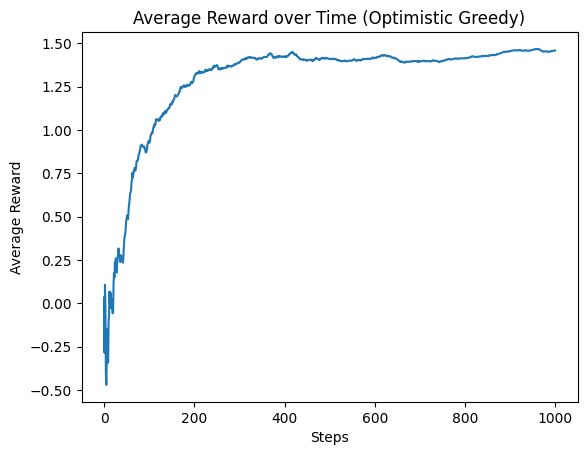

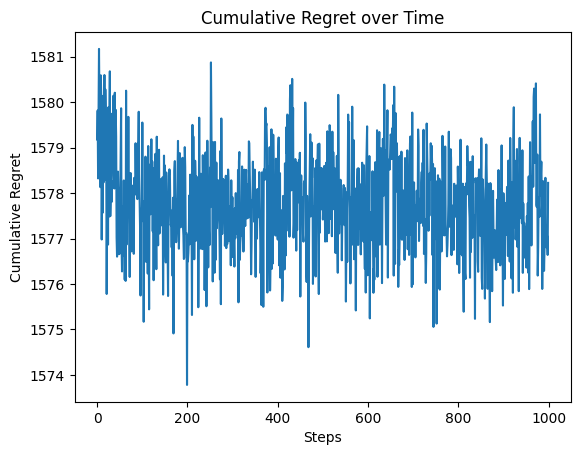

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class StochasticBandit:
    def __init__(self, n_arms):
        """
        Initialize a stochastic K-armed bandit problem with random reward distributions.

        Args:
            n_arms (int): Number of arms (actions) in the bandit.
        """
        self.n_arms = n_arms
        self.q_true = np.random.normal(0, 1, self.n_arms)  # True reward distributions for each arm

    def pull_arm(self, arm_idx):
        """
        Simulate pulling an arm and receiving a reward from the chosen arm.

        Args:
            arm_idx (int): Index of the arm to pull.

        Returns:
            float: Reward received from pulling the chosen arm.
        """
        reward = np.random.normal(self.q_true[arm_idx], 1)  # Reward from a normal distribution around q_true
        return reward

class OptimisticGreedyAgent:
    def __init__(self, n_arms, initial_value=0.0):
        """
        Initialize an Optimistic Greedy agent for the stochastic bandit problem.

        Args:
            n_arms (int): Number of arms in the bandit.
            initial_value (float): Initial optimistic value estimate for each arm.
        """
        self.n_arms = n_arms
        self.Q = np.full(n_arms, initial_value)  # Optimistic value estimates for each arm

    def choose_arm(self):
        """
        Optimistic Greedy action selection: choose the arm with the highest estimated value.

        Returns:
            int: Index of the chosen arm based on estimated values.
        """
        arm_idx = np.argmax(self.Q)  # Choose arm with the highest estimated value
        print(f"Choosing arm {arm_idx} with estimated value {self.Q[arm_idx]}")
        return arm_idx

    def update(self, arm_idx, reward):
        """
        Update Q-values based on the received reward from pulling a specific arm.

        Args:
            arm_idx (int): Index of the arm that was pulled.
            reward (float): Reward received from pulling the arm.
        """
        # Optimistic update: encourage exploration by using a high initial value
        self.Q[arm_idx] = (self.Q[arm_idx] + reward) / 2  # Update Q-value estimate incrementally
        print(f"Updated Q-value for arm {arm_idx}: {self.Q[arm_idx]}")


def run_bandit_simulation(agent, bandit, num_steps):
    """
    Run a simulation of the bandit problem with a specific agent over a given number of steps.

    Args:
        agent (object): Bandit agent implementing a specific policy (e.g., OptimisticGreedyAgent).
        bandit (object): StochasticBandit instance representing the environment.
        num_steps (int): Number of steps (arm pulls) to simulate.

    Returns:
        list: List of rewards received at each step of the simulation.
        list: List of cumulative regrets at each step of the simulation.
    """
    rewards = []
    cumulative_regret = []
    optimal_reward = np.max(bandit.q_true) * num_steps  # Maximum possible reward (optimal arm)
    optimal_arm_idx = np.argmax(bandit.q_true)  # Index of the optimal arm

    for t in range(1, num_steps + 1):
        arm_idx = agent.choose_arm()  # Agent chooses which arm to pull
        reward = bandit.pull_arm(arm_idx)  # Bandit returns a reward for the chosen arm
        agent.update(arm_idx, reward)  # Agent updates its policy based on the received reward
        rewards.append(reward)

        # Calculate regret
        if arm_idx == optimal_arm_idx:
            regret = optimal_reward - reward
        else:
            regret = optimal_reward - rewards[-1]
        cumulative_regret.append(regret)

        print(f"Step {t}: Chose arm {arm_idx}, received reward {reward}, cumulative regret: {cumulative_regret[-1]}")

    return rewards, cumulative_regret


# Main code to run the Bounded Regret Policy (BRP) simulation
if __name__ == "__main__":
    np.random.seed(42)  # Set random seed for reproducibility

    # Parameters
    n_arms = 10  # Number of arms in the bandit
    num_steps = 1000  # Number of steps (arm pulls) in the simulation

    # Initialize a stochastic K-armed bandit problem
    bandit = StochasticBandit(n_arms)

    # Initialize an Optimistic Greedy agent (optimistic initial values)
    agent = OptimisticGreedyAgent(n_arms, initial_value=10.0)

    # Run the BRP simulation with the chosen agent
    rewards, cumulative_regret = run_bandit_simulation(agent, bandit, num_steps)

    # Plot average reward over time
    avg_rewards = np.cumsum(rewards) / np.arange(1, num_steps + 1)
    plt.plot(avg_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time (Optimistic Greedy)')
    plt.show()

    # Plot cumulative regret over time
    plt.plot(cumulative_regret)
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Regret')
    plt.title('Cumulative Regret over Time')
    plt.show()
